In [1]:
from sympy import init_session
from sympy import div, QQ
from sympy.parsing.latex import parse_latex
from sympy.parsing.sympy_parser import parse_expr
from IPython.display import Markdown as md
from IPython.display import display
import pandas as pd

import numpy as np
import seaborn as sns


import scipy as sc
from tabulate import tabulate
from scipy.stats import cumfreq, relfreq, stats


init_session()

a, b, c, d = symbols('a b c d', real = True)
from docparts import añadir_ejercicios, doc_ejer, escribir_preambulo, escribir_ejercicios, escribir_fin

df_ejercicios = pd.DataFrame()

fichero = 'est2'
titulo = '42 - Estadística Bidimensional'
curso = '1BC'


x,y = symbols('x, y', real=True)

%matplotlib inline


IPython console for SymPy 1.2 (Python 3.6.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://docs.sympy.org/1.2/



**La temperatura media en los meses de invierno en varias ciudades y el gasto medio por habitante en
calefacción ha sido\\\begin{tabular}{lrrrr}
\hline
                      &   0 &   1 &   2 &   3 \\
\hline
 Temperatura (grados) &  10 &  12 &  14 &  16 \\
 Gasto (euros)        & 150 & 120 & 102 &  90 \\
\hline
\end{tabular}**

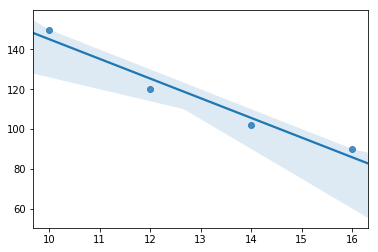

In [2]:
# Página 93 ejercicio 5

texto_ejercicio = r"""La temperatura media en los meses de invierno en varias ciudades y el gasto medio por habitante en
calefacción ha sido"""



n_ejercicio = 'p093e05'
enunciado_latex, enunciado, solucion = [],[],[]

datos = np.array([[10  , 150 ],
       [12 , 120],
       [14 , 102],
       [16  , 90]
       ])


tabla_enunciado = pd.DataFrame({'Temperatura (grados)':datos[:,0],'Gasto (euros)':datos[:,1]}).T
tabla_enunciado_latex = tabulate(tabla_enunciado, headers="keys", tablefmt="latex").replace('\\$','$').replace('textbackslash{}','')
texto_ejercicio = texto_ejercicio + r'\\'+ tabla_enunciado_latex

display(md("**"+texto_ejercicio+"**"))

## Manipulación de datos 


tabla = pd.DataFrame({r'x': datos[:,0],'y': datos[:,1],
                      'xy': datos[:,0]*datos[:,1],'x2':datos[:,0]**2,'y2':datos[:,1]**2})
tabla

#totales = np.array([np.nan,np.nan,np.nan,tabla.f_i.sum(),tabla.F_i.sum()])
totales = pd.DataFrame([[tabla.x.sum(),tabla.y.sum(),tabla.xy.sum(),tabla.x2.sum(),
                         tabla.y2.sum()]],columns=list(tabla.columns))
totales

medias = pd.DataFrame([[tabla.x.mean(),tabla.y.mean(),tabla.xy.mean(),tabla.x2.mean(),
                         tabla.y2.mean()]],columns=list(tabla.columns))
medias

tabla_agregada =tabla.append(totales,ignore_index=True).append(medias,ignore_index=True)

tabla_agregada


# pregunta 1
enunciado_latex.append("Haz una tabla de frecuencias con los datos que necesites para hace el resto de apartados")
enunciado.append("Haz una tabla de frecuencias con los datos que necesites para hace el resto de apartados")
solucion.append(tabulate(tabla.append(totales,ignore_index=True), headers="keys", tablefmt="latex"))

# pregunta 2

enunciado_latex.append("Calcula el gasto medio")
enunciado.append("Calcula el gasto medio")

media = np.mean(datos[:,1])
media

solucion.append({'media':media})

# pregunta  3

enunciado_latex.append("Halla el coeficiente de correlación lineal e interprétalo")
enunciado.append("Halla el coeficiente de correlación lineal e interprétalo")


pendiente, ordenada, coefcorr = stats.linregress(datos)[:3]

solucion.append({'media de x': np.mean(datos[:,0]),
                 'desviación de x' : np.std(datos[:,0]),
                 'media de y' : np.mean(datos[:,1]),
                 'desviación de y' : np.std(datos[:,1]),                 
                 'covarianza': np.cov(datos[:,0],datos[:,1],bias=True)[0][1],
                 'coeficiente de correlación': coefcorr})

# pregunta  4

valor_a_estimar = 11

enunciado_latex.append("Estima el gasto medio por habitante de una ciudad si la temperatura media hubiera sido {}ºC".format(valor_a_estimar))
enunciado.append("Estima el gasto medio por habitante de una ciudad si la temperatura media hubiera sido {}ºC".format(valor_a_estimar))

f1 = sns.regplot(datos[:,0],datos[:,1]).figure
f1.savefig(str(n_ejercicio)+".pgf")



(pendiente*x+ordenada).subs(x,valor_a_estimar)

solucion.append(r"$"+ latex(Eq(y,pendiente*x+ordenada))+r"$ \\"+
                r"\resizebox {0.5\textwidth}{!}{\input{"+str(n_ejercicio)+r".pgf}}\\"+
                r"La estimación para x=" + latex(valor_a_estimar)+r" es: "+latex((pendiente*x+ordenada).subs(x,valor_a_estimar)))
   

df_ejercicios = df_ejercicios.append(añadir_ejercicios(enunciado_latex, enunciado, solucion, texto_ejercicio, curso, titulo , n_ejercicio, '1', '1', enun_tex=False, sol_tex=False), ignore_index=True)


In [3]:
df_ejercicios

,enunciado_latex,enunciado,solucion,texto,curso,titulo,n_ejercicio,dificultad,n_columnas,puntos,enun_tex,sol_tex
0,Haz una tabla de frecuencias con los datos que...,Haz una tabla de frecuencias con los datos que...,\begin{tabular}{rrrrrr}\n\hline\n & x & ...,La temperatura media en los meses de invierno ...,1BC,42 - Estadística Bidimensional,p093e05,1,1,1,False,False
1,Calcula el gasto medio,Calcula el gasto medio,{'media': 115.5},La temperatura media en los meses de invierno ...,1BC,42 - Estadística Bidimensional,p093e05,1,1,1,False,False
2,Halla el coeficiente de correlación lineal e i...,Halla el coeficiente de correlación lineal e i...,"{'media de x': 13.0, 'desviación de x': 2.2360...",La temperatura media en los meses de invierno ...,1BC,42 - Estadística Bidimensional,p093e05,1,1,1,False,False
3,Estima el gasto medio por habitante de una ciu...,Estima el gasto medio por habitante de una ciu...,$y = - 9.9 x + 244.2$ \\\resizebox {0.5\textwi...,La temperatura media en los meses de invierno ...,1BC,42 - Estadística Bidimensional,p093e05,1,1,1,False,False


In [4]:
df_ejercicios.to_csv('ejercicios42.csv', index = False)

In [5]:
df_ejercicios = pd.read_csv('ejercicios42.csv', index_col= None)

In [6]:
escribir_preambulo(fichero, titulo, 'ejercicios')
for s in df_ejercicios.groupby('n_ejercicio').count().index : 
    display(md("**Ejercicio: **" + s ))
    display(df_ejercicios[df_ejercicios.n_ejercicio == s])
    escribir_ejercicios(df_ejercicios[df_ejercicios.n_ejercicio == s],fichero)

escribir_fin(fichero)

**Ejercicio: **p093e05

,enunciado_latex,enunciado,solucion,texto,curso,titulo,n_ejercicio,dificultad,n_columnas,puntos,enun_tex,sol_tex
0,Haz una tabla de frecuencias con los datos que...,Haz una tabla de frecuencias con los datos que...,\begin{tabular}{rrrrrr}\n\hline\n & x & ...,La temperatura media en los meses de invierno ...,1BC,42 - Estadística Bidimensional,p093e05,1,1,1,False,False
1,Calcula el gasto medio,Calcula el gasto medio,{'media': 115.5},La temperatura media en los meses de invierno ...,1BC,42 - Estadística Bidimensional,p093e05,1,1,1,False,False
2,Halla el coeficiente de correlación lineal e i...,Halla el coeficiente de correlación lineal e i...,"{'media de x': 13.0, 'desviación de x': 2.2360...",La temperatura media en los meses de invierno ...,1BC,42 - Estadística Bidimensional,p093e05,1,1,1,False,False
3,Estima el gasto medio por habitante de una ciu...,Estima el gasto medio por habitante de una ciu...,$y = - 9.9 x + 244.2$ \\\resizebox {0.5\textwi...,La temperatura media en los meses de invierno ...,1BC,42 - Estadística Bidimensional,p093e05,1,1,1,False,False
